importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import data files

In [2]:
from google.colab import files
files.upload()

Saving alzheimers_disease_data.csv to alzheimers_disease_data.csv


{'alzheimers_disease_data.csv': b'PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge\n4751,73,0,0,2,22.927749230993864,0,13.29721772827684,6.327112473553353,1.3472143059081076,9.025678665766115,0,0,1,1,0,0,142,72,242.36683969636556,56.15089696091113,33.68256349839592,162.18914307736603,21.46353236431666,6.518876973217633,0,0,1.7258834599441897,0,0,0,1,0,0,XXXConfid\n4752,89,0,0,0,26.82768119159602,0,4.5425238177221905,7.619884540163032,0.5187671386507053,7.151292743051223,0,0,0,0,0,0,115,64,231.16259501016503,193.4079955157258,79.02847731570753,294.63090921495643,20

displaying the data


In [4]:
alzheimers_data=pd.read_csv('alzheimers_disease_data.csv')
alzheimers_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


printing the first five rows


In [5]:
alzheimers_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Information about data

In [6]:
alzheimers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

To find null or missing value in dataset

In [7]:
alzheimers_data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


To remove specific columns of dataset

In [8]:
X = alzheimers_data.drop(columns=['Diagnosis','DoctorInCharge'],axis=1)
Y = alzheimers_data['Diagnosis']

To print X values


In [9]:
print(X)

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQua

To print Y values

In [10]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64


To draw a distplot of Age distribution

<ipython-input-11-0f182c18a68d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alzheimers_data['Age'])


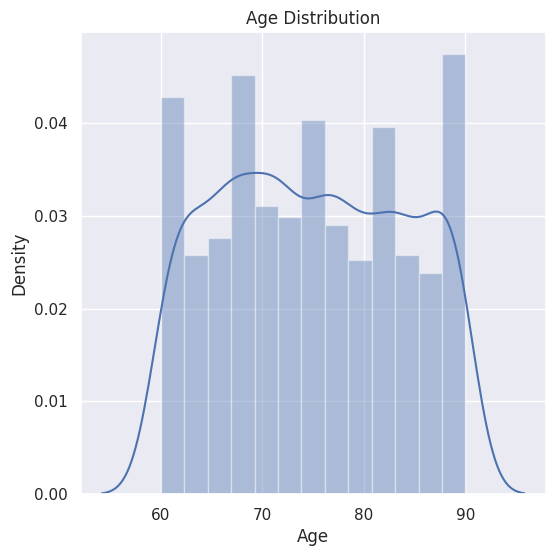

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(alzheimers_data['Age'])
plt.title('Age Distribution')
plt.show()

To draw a count plot

<Axes: xlabel='Forgetfulness', ylabel='count'>

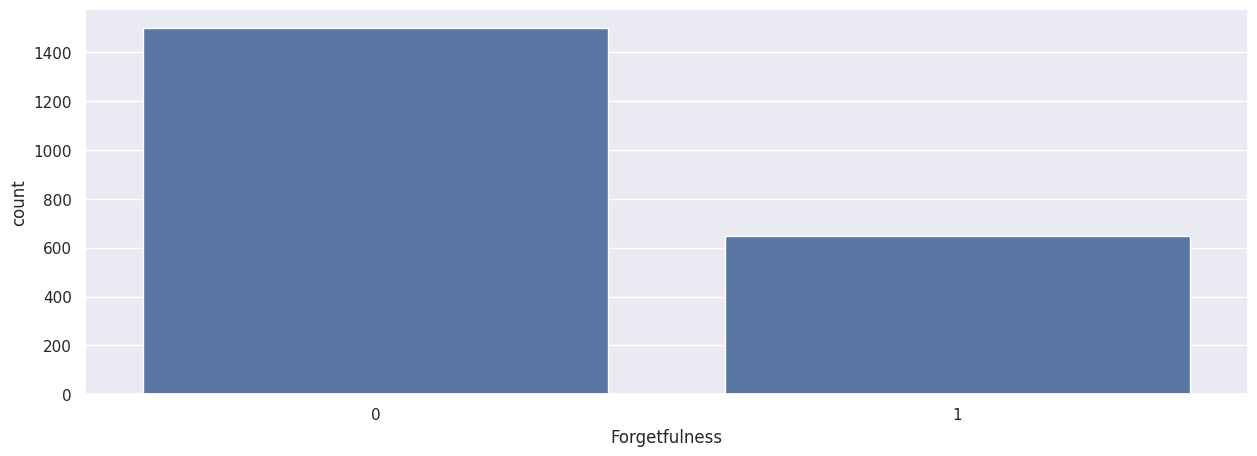

In [12]:
sns.set()
plt.figure(figsize=(15,5))
# colors=sns.color_palette('set1')
sns.countplot(x='Forgetfulness',data=alzheimers_data)

To draw a bar diagram


<Axes: xlabel='Gender', ylabel='Diagnosis'>

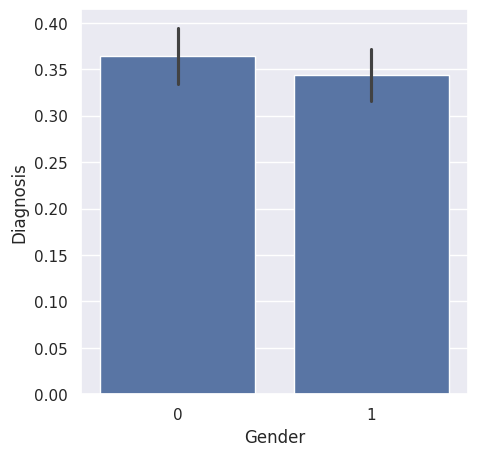

In [13]:
plot = plt.figure(figsize=(5,5))
cc=["red","blue"]
colors = sns.color_palette(cc)
sns.barplot(x='Gender',y='Diagnosis',data=alzheimers_data)


In [14]:
cor=X.corr()

<Axes: >

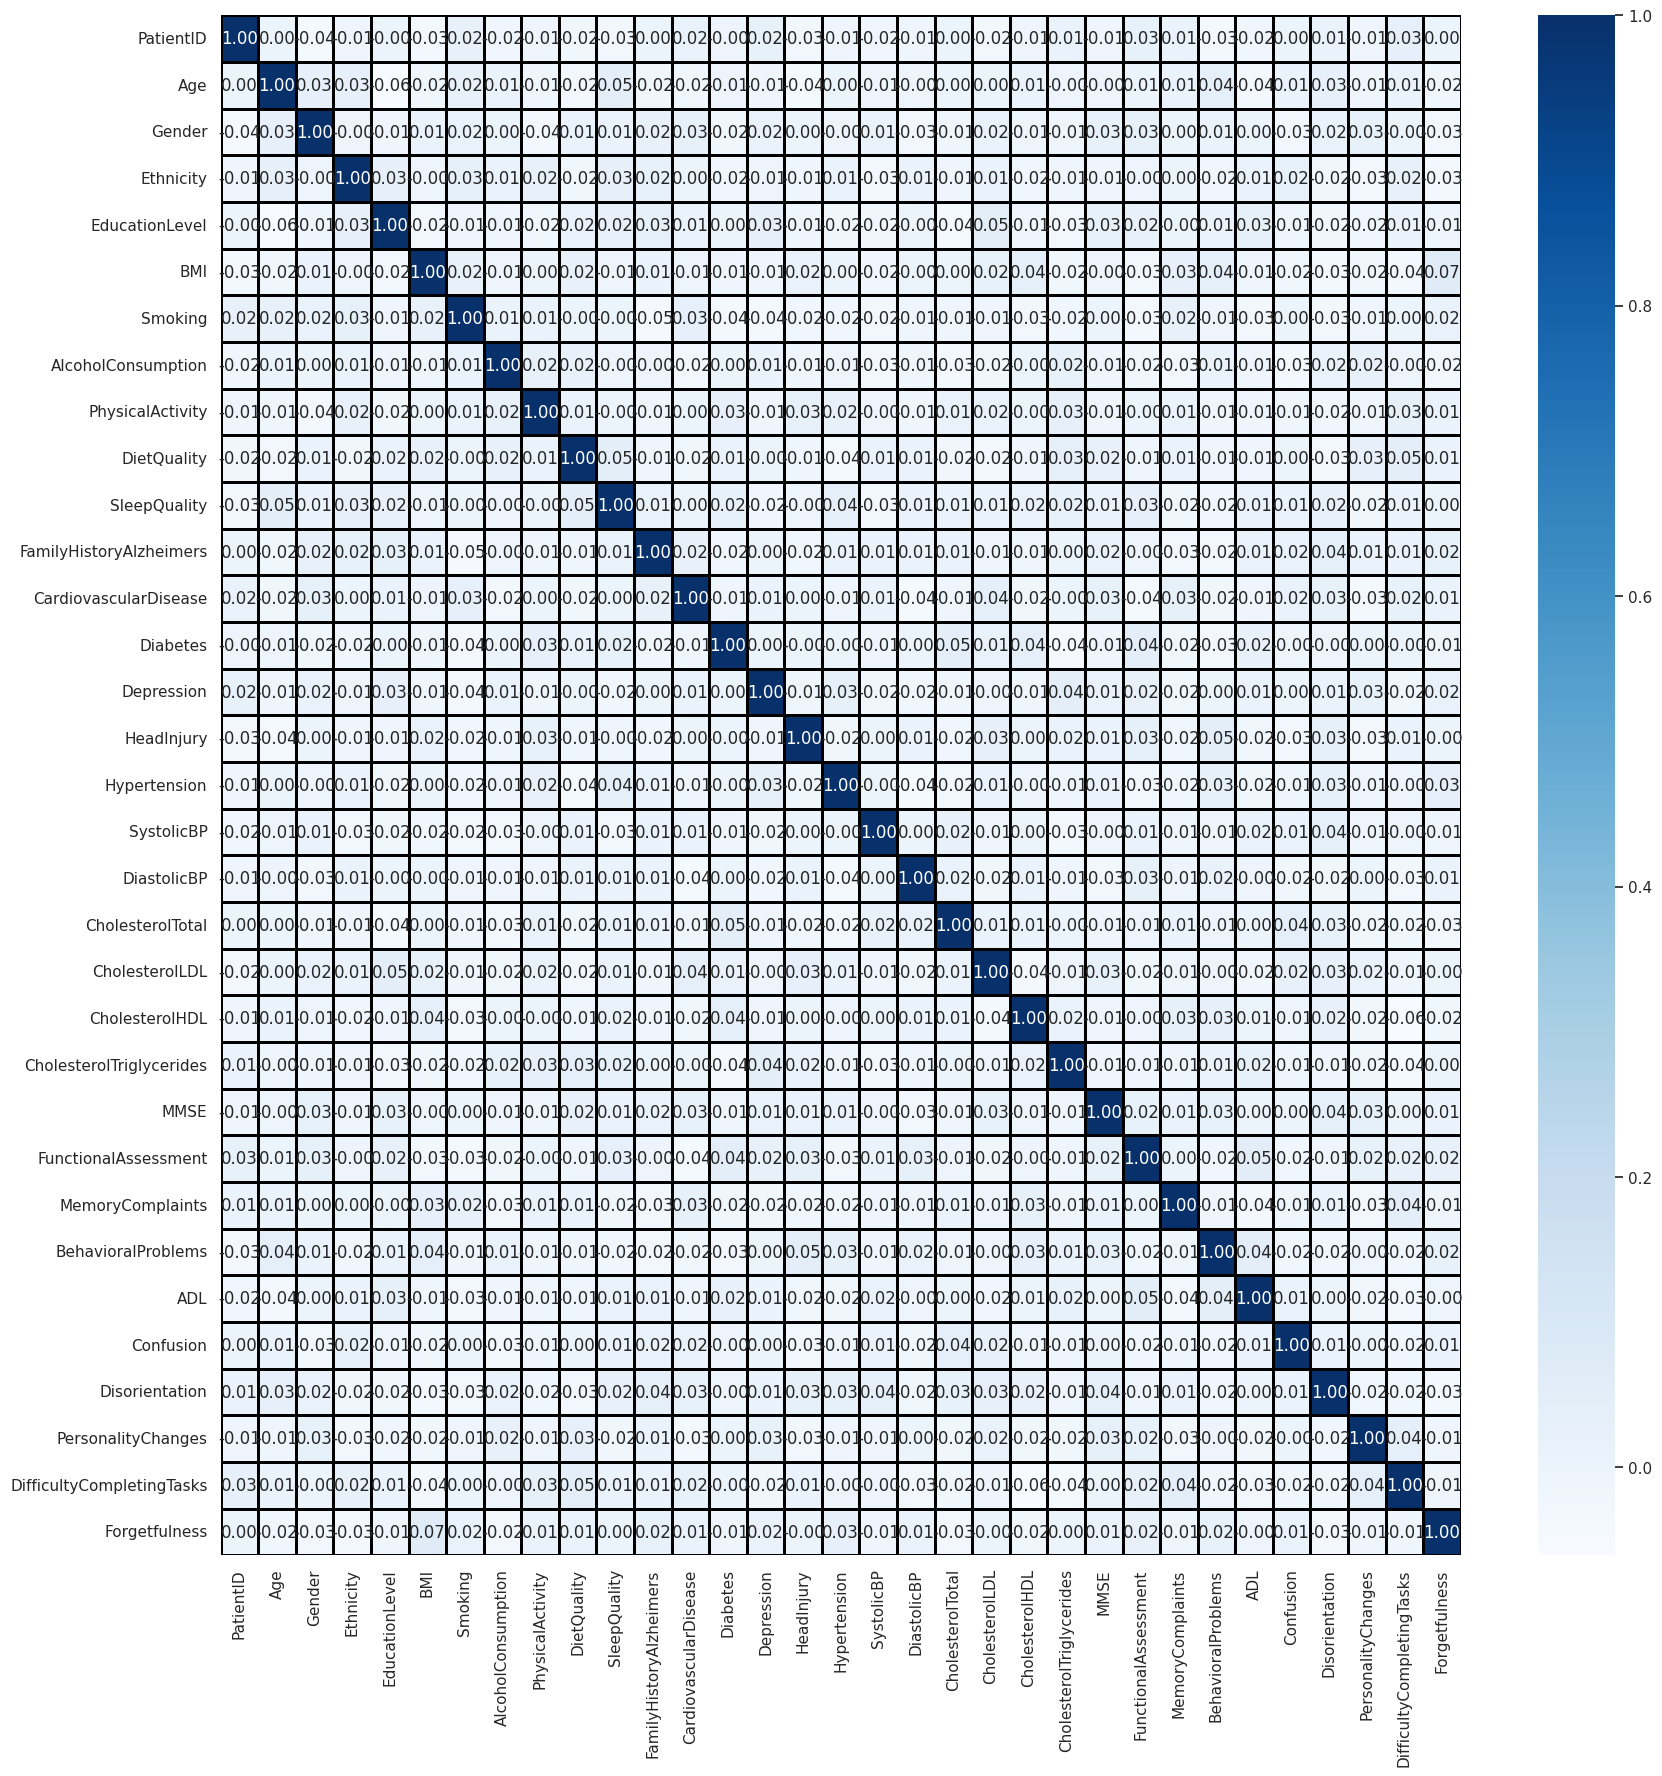

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot = True,cmap = 'Blues',fmt = '.2f',linewidths= 2,linecolor= 'black')

To import all necessary model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
from sklearn. naive_bayes import GaussianNB
gnb = GaussianNB()
# from sklearn import svm
# svm=svm.SVC(kernel='linear')


finding maximum accuracy

In [17]:
list=[knn,model,RF,clf,gnb]
max=-1
j1=None
i1=None
for i in list:
  for j in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=j)
    i.fit(X_train,Y_train)
    Y_predict=i.predict(X_test)
    accuracy=accuracy_score(Y_predict,Y_test)
    if accuracy>max:
      max=accuracy
      j1=j
      i1=i


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [18]:
print('The maximum accuracy is:',max)


The maximum accuracy is: 0.9813953488372092


In [19]:
print('The random state corresponding to it is:',j1)

The random state corresponding to it is: 83


In [20]:
print('The classification type is:',i1)

The classification type is: RandomForestClassifier()


In [22]:
X_test.to_csv("file",index=False)
files.download("file")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
input_data = (5318,60,0,2,3,29.138579212560025,0,14.798546830173764,1.632034199355653,1.0825798944993226,8.868287562258244,0,0,0,1,0,0,154,70,168.50249912244132,102.40683914798716,34.94250188943116,74.15107293557426,27.644161035923403,1.54593111090487,1,0,3.66091231574343,1,0,0,0,0
)
#changing input data as numpy array
input_data_as_numpy_array = np.array(input_data)
# reshape the np array as we are predicting for 1 instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction[0])

if (prediction[0] == 1):
  print('person is having chronic alzheimers')
else:
  print('person is not having alzheimers')

0
person is not having alzheimers


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
